# Classification Origin

Papers:

https://www.semanticscholar.org/paper/Music-and-Geography%3A-Content-Description-of-Musical-G%C3%B3mez-Haro/4d48f2eaefc6a8336149e4cca1c5d2264969f223#paper-topics



In [2]:
import csv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import the colormap module
import folium
from scipy.spatial import Voronoi
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing



In [60]:
#make PCA:
scaler = preprocessing.StandardScaler()
music_origin_gdf_scaled = scaler.fit_transform(music_origin_gdf.drop(['Latitude', 'Longitude', 'geometry', 'iso3',
                                                                      'status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_',
                                                                      'french_shor'],axis=1))
nums = np.arange(68)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num).fit(music_origin_gdf_scaled)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

In [3]:
music_origin_data = pd.read_csv('./data/kaggle/Music_origin.csv')
music_origin_cr_data = pd.read_csv('./data/kaggle/Music_origin_chromatic.csv')
gdf_bondaries = gpd.read_file('./data/countries/world-administrative-boundaries.shp')

music_origin_data.drop('Unnamed: 0',axis=1,inplace=True)
music_origin_cr_data.drop('Unnamed: 0',axis=1,inplace=True)

C:\Users\claud\AppData\Local\Temp\ipykernel_22644\229727454.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


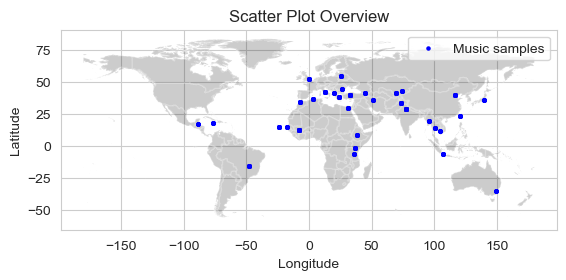

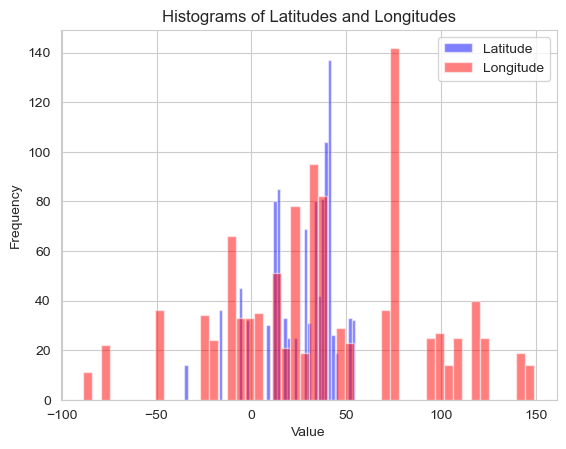

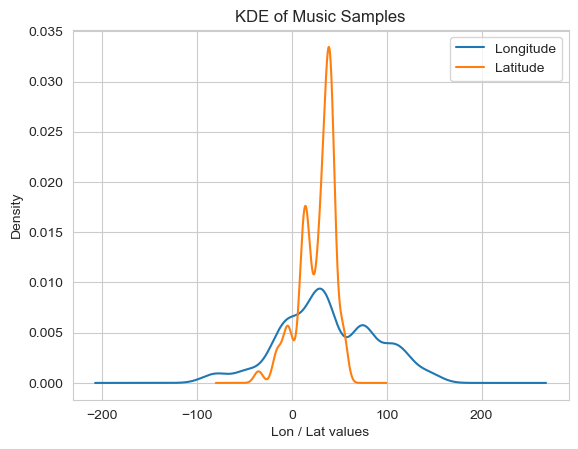

In [4]:
with open('./data/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))




gdf_bondaries.plot(ax=plt.gca(), color='black', alpha=0.2, label='Shapefile')
plt.scatter(music_origin_data["Longitude"], music_origin_data["Latitude"], s=5, color = "blue",label = 'Music samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Overview')
plt.legend()
plt.show()


plt.hist(music_origin_data["Latitude"], bins=50, alpha=0.5, color='blue', label='Latitude')
plt.hist(music_origin_data["Longitude"], bins=50, alpha=0.5, color='red', label='Longitude')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histograms of Latitudes and Longitudes')
plt.show()



music_origin_data[["Longitude","Latitude"]].plot.kde()
plt.xlabel('Lon / Lat values')
plt.title('KDE of Music Samples')
plt.show()

In [57]:
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster


geometry = [Point(xy) for xy in zip(music_origin_data['Longitude'], music_origin_data['Latitude'])]
music_origin_gdf = gpd.GeoDataFrame(music_origin_data, geometry=geometry, crs="EPSG:4326")
music_origin_gdf = gpd.sjoin(music_origin_gdf, gdf_bondaries, how="left", op="within")
unmatched_points = music_origin_gdf[music_origin_gdf['iso3'].isna()].copy()

for idx, point in unmatched_points.iterrows():
    point_geom = point['geometry']
    nearest_polygon_idx = gdf_bondaries.geometry.distance(point_geom).idxmin()
    nearest_polygon_attributes = gdf_bondaries.loc[nearest_polygon_idx]
    nearest_polygon_attributes['geometry'] = point_geom
    music_origin_gdf.loc[idx, music_origin_gdf.columns.intersection(nearest_polygon_attributes.index)] = nearest_polygon_attributes

music_origin_gdf = music_origin_gdf.drop(columns=['index_right']).rename(columns={'index_left': 'index'})


C:\ProgramData\Anaconda3\envs\Zonal_Generatuor_new\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\claud\AppData\Local\Temp\ipykernel_22644\2858131190.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nearest_polygon_idx = gdf_bondaries.geometry.distance(point_geom).idxmin()
C:\Users\claud\AppData\Local\Temp\ipykernel_22644\2858131190.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_polygon_attributes['geometry'] = point_geom


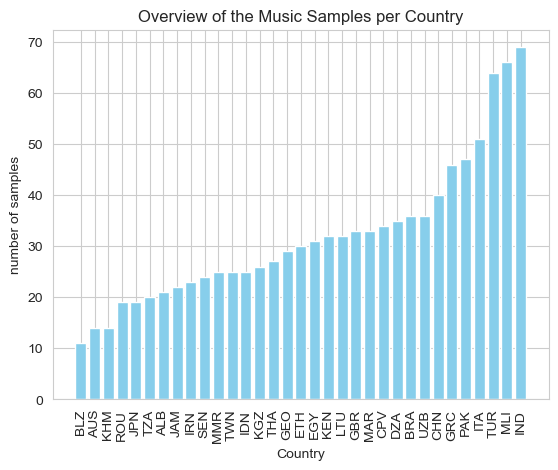

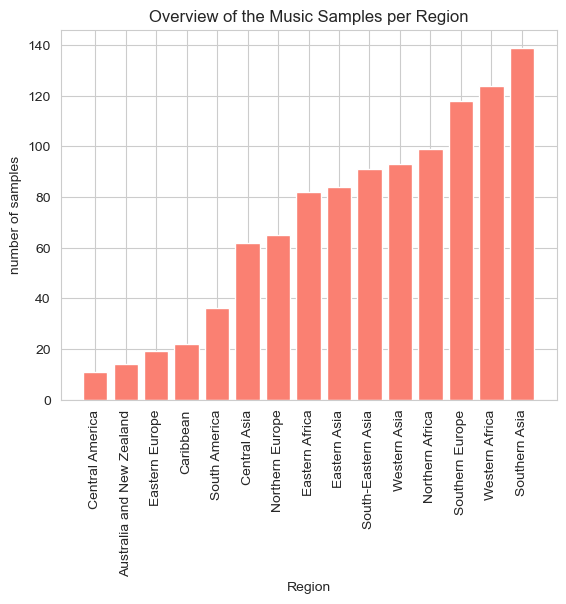

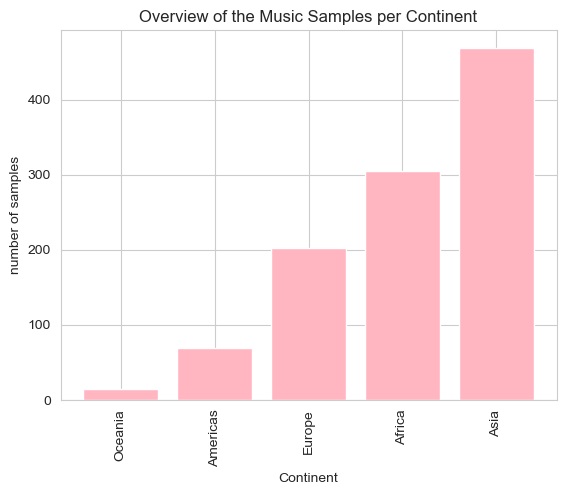

In [58]:
per_country = music_origin_gdf.groupby('iso3').nunique().reset_index().sort_values('Feature1')
plt.bar(per_country["iso3"],per_country["Feature1"], color = "skyblue")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per Country")
plt.ylabel("number of samples")
plt.xlabel("Country")
plt.show()

per_region = music_origin_gdf.groupby('region').nunique().reset_index().sort_values('Feature1')
plt.bar(per_region["region"],per_region["Feature1"], color = "salmon")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per Region")
plt.ylabel("number of samples")
plt.xlabel("Region")
plt.show()

per_continent = music_origin_gdf.groupby('continent').nunique().reset_index().sort_values('Feature1')
plt.bar(per_continent["continent"],per_continent["Feature1"], color = "lightpink")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per Continent")
plt.ylabel("number of samples")
plt.xlabel("Continent")
plt.show()

# Have a Look at the 68 Features

Text(0.5, 1.0, 'Boxplot of all Features of the Music Dataset')

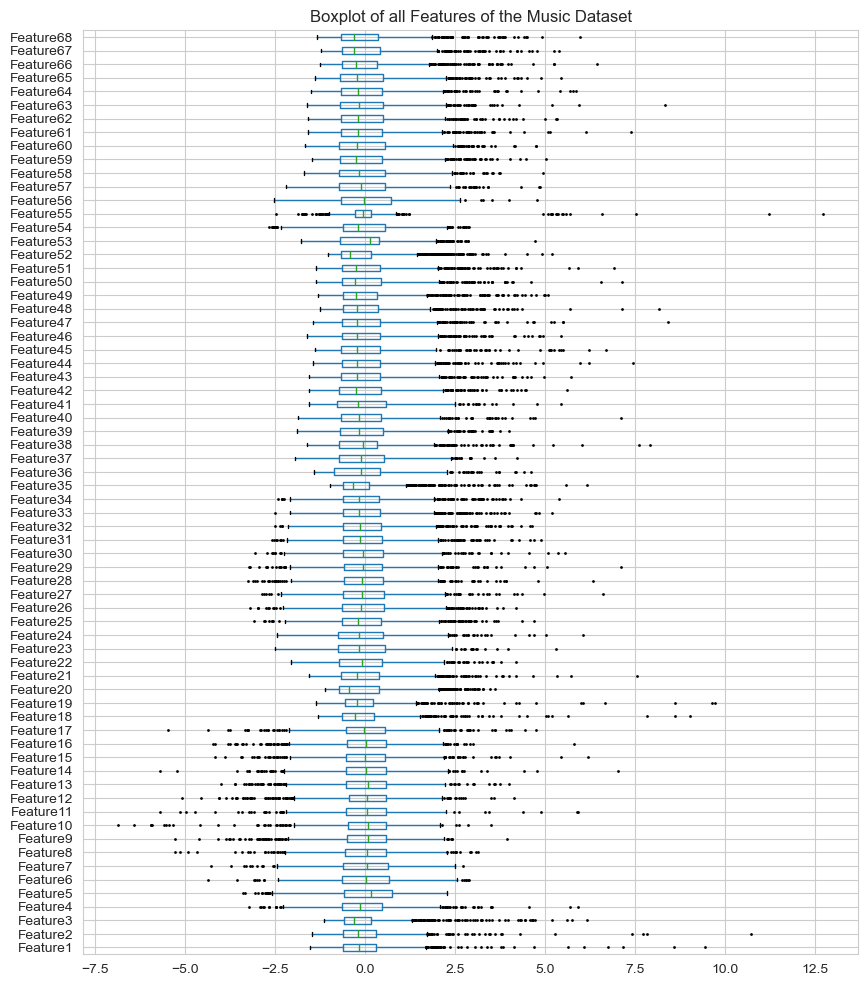

In [59]:
plt.figure(figsize=(10, 12))
music_origin_gdf.drop(['Latitude', 'Longitude', 'geometry', 'iso3',
                        'status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_',
                        'french_shor'],axis=1).boxplot(vert=False,
                                                       flierprops={'marker': 'o', 'markersize': 1})

plt.title("Boxplot of all Features of the Music Dataset")

There are alot of features, thus it could be an idea, to make a Principle Component Analysis to reduce the number of features.

# PCA

Text(3, 0.15, '20% cut-off')

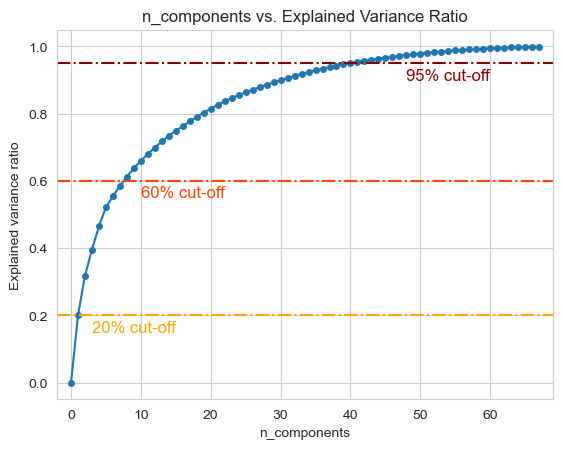

In [61]:
plt.plot(nums,var_ratio,marker='o',markersize = 4)
plt.xlim(-2,69)
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.axhline(y=0.95, color='darkred', linestyle='-.')
plt.text(48, 0.9, '95% cut-off', color = 'darkred', fontsize=12)
plt.axhline(y=0.6, color='orangered', linestyle='-.')
plt.text(10, 0.55, '60% cut-off ', color = 'orangered', fontsize=12)
plt.axhline(y=0.2, color='orange', linestyle='-.')
plt.text(3, 0.15, '20% cut-off', color = 'orange', fontsize=12)

Okay, we choose the 95% cut-off beacuse then we have 95% of the variance explained, which is quite good.

Number of components to reach 95% cutoff: 41
Number of components to reach 60% cutoff: 9
Number of components to reach 20% cutoff: 3


Text(0.5, 1.0, 'Boxplot of all Features of the Music Dataset after PCA')

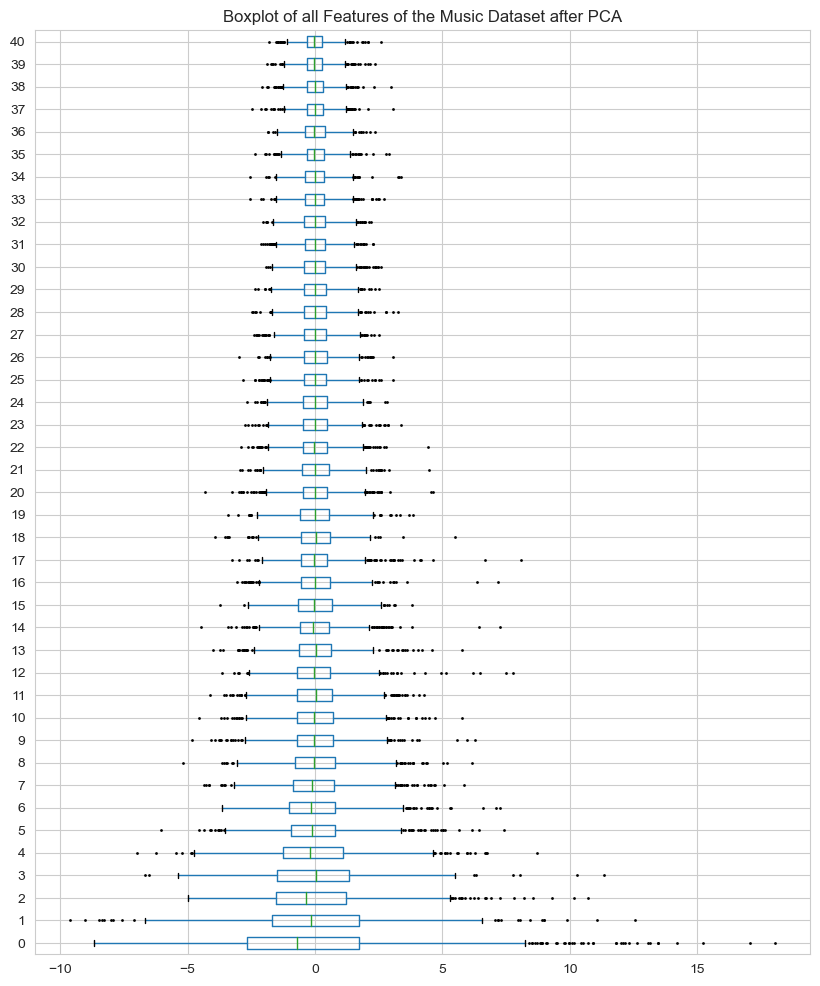

In [62]:
def get_num_components(percent,var_ratio = var_ratio):
    num_components_XX_percent = np.argmax(np.array(var_ratio) >= percent/100) + 1
    #print(f"Number of components to reach {percent}% cutoff: {num_components_XX_percent}")
    return num_components_XX_percent

print(f"Number of components to reach 95% cutoff: {get_num_components(95)}")
print(f"Number of components to reach 60% cutoff: {get_num_components(60)}")
print(f"Number of components to reach 20% cutoff: {get_num_components(20)}")

#make PCA with 95% cutoff
music_origin_pca= pd.DataFrame(PCA(n_components=get_num_components(95)).fit_transform(music_origin_gdf_scaled))
music_origin_gdf_pca = music_origin_pca.merge(music_origin_gdf.loc[:,['Latitude', 'Longitude', 'iso3',
                                                                          'status', 'color_code', 'name', 'continent', 'region', 'iso_3166_1_',
                                                                          'french_shor']], left_index=True, right_index=True)


plt.figure(figsize=(10, 12))
music_origin_pca.boxplot(vert=False, flierprops={'marker': 'o', 'markersize': 1})

plt.title("Boxplot of all Features of the Music Dataset after PCA")

# Clustering

To make this problem to a classification problem, we have to define clusters in order to classify the music samples

## Manual Clustering (geographic boundaries made by humans)

In [105]:
#By region
gdf_regions = gdf_bondaries.dissolve(by='region')
gdf_regions["region"] = gdf_regions.index
gdf_regions1 = gdf_regions[gdf_regions["region"].isin(music_origin_gdf_pca.region.unique())]

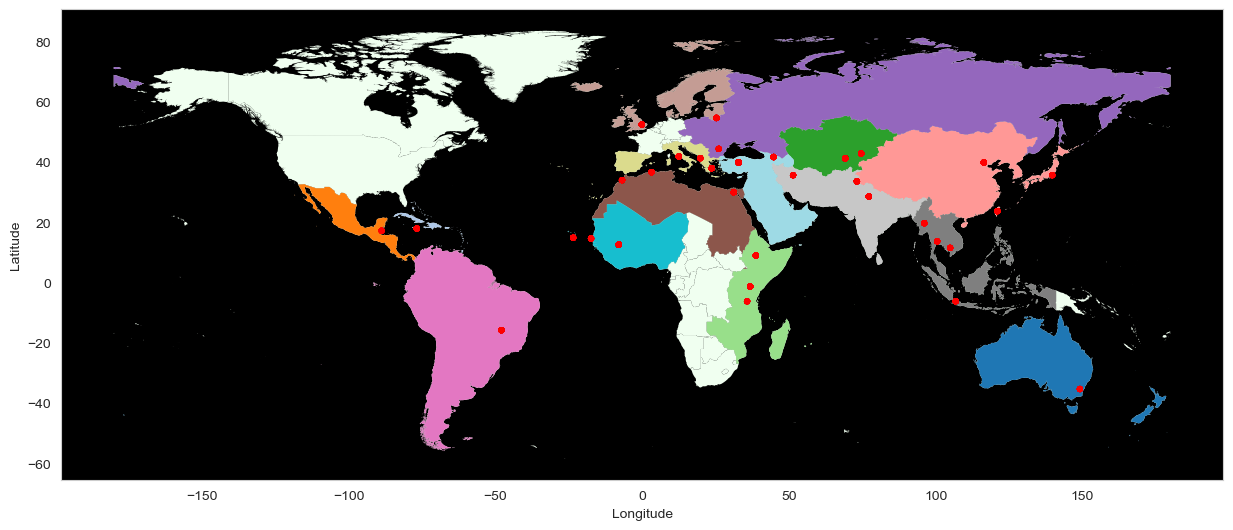

In [133]:
plt.figure(figsize=(15,15))
gdf_bondaries.plot(ax=plt.gca(), color = "honeydew",edgecolor = "none")
gdf_regions1.plot(ax=plt.gca(), column='region', cmap="tab20", alpha=1, legend=False, label='World Regions',edgecolor = "none")
plt.scatter(music_origin_data["Longitude"], music_origin_data["Latitude"], s=20, color = "red",label = 'Music samples',edgecolor = "none")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor("black")
plt.grid(False)

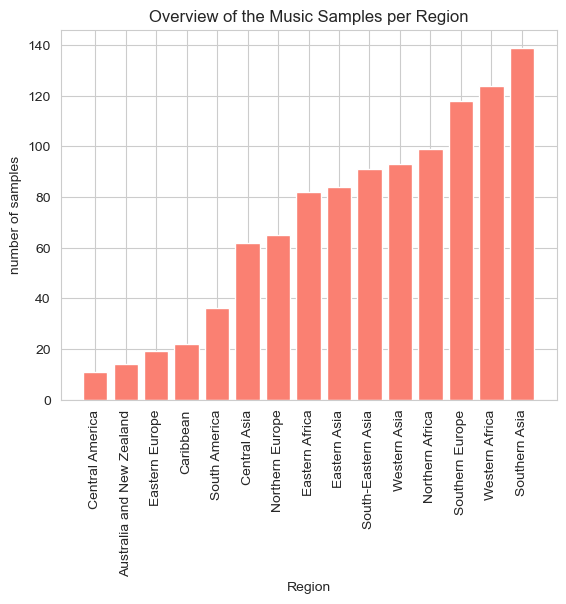

In [143]:
per_region = music_origin_gdf_pca.groupby('region').nunique().reset_index().sort_values(1)
plt.bar(per_region["region"],per_region[1], color = "salmon")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per Region")
plt.ylabel("number of samples")
plt.xlabel("Region")
plt.show()

As seen here, we can see that the clusters are not equally distributed, which can lead to a false good prediction, because the chances that it lies in southern Asia is about the same. We try now to DBSCAN the points to clusters.

## Automatic Clustering (DBScan Method)

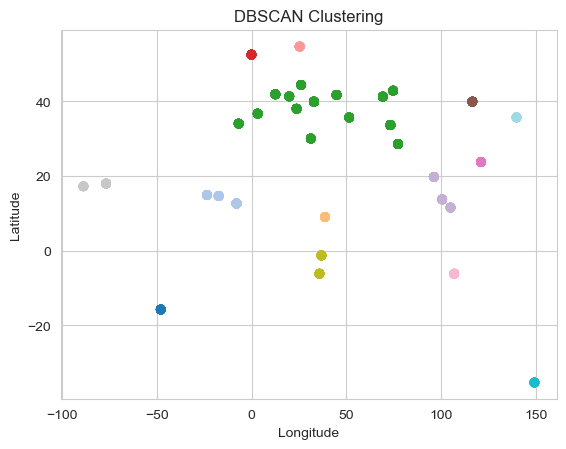

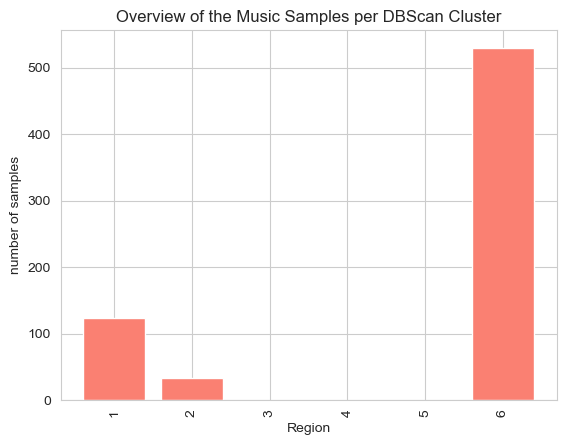

,0,1,2,3,4,5,6,7,8,9,...,Longitude,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,Cluster
0,-1.068725,8.437277,5.197231,8.031616,5.961670,1.251662,3.256400,1.772884,0.748380,-0.797093,...,-47.95,BRA,Member State,BRA,Brazil,Americas,South America,BR,BrÃ©sil,0
1,0.190528,0.862663,0.072850,2.825874,-0.648759,-0.943280,-0.801304,2.236504,0.254379,-0.098463,...,-23.51,CPV,Member State,CPV,Cape Verde,Africa,Western Africa,CV,Cabo Verde,1
2,4.149918,-1.397989,-2.099784,0.745890,-2.962653,0.924671,-0.798062,1.333749,0.223072,1.625622,...,-8.00,MLI,Member State,MLI,Mali,Africa,Western Africa,ML,Mali,1
3,-0.947960,4.093904,2.281610,-0.324633,-1.668091,1.755334,-0.779104,1.675248,-0.454885,1.931957,...,38.74,ETH,Member State,ETH,Ethiopia,Africa,Eastern Africa,ET,Ãthiopie,2
4,0.366876,-1.564429,0.080291,2.907154,0.253194,-0.759745,0.033476,1.173409,-1.139326,0.068760,...,-6.85,MAR,Member State,MAR,Morocco,Africa,Northern Africa,MA,Maroc,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,6.036341,1.331828,-1.964494,3.493874,-1.804094,0.370079,-1.313047,-0.240937,-2.254621,2.249632,...,35.74,TZA,Member State,TZA,United Republic of Tanzania,Africa,Eastern Africa,TZ,RÃ©publique-Unie de Tanzanie,11
1055,5.145328,-3.306242,2.368449,2.543880,-1.145478,-2.740120,0.461464,-1.368068,-2.773437,0.671454,...,104.91,KHM,Member State,KHM,Cambodia,Asia,South-Eastern Asia,KH,Cambodge,6
1056,-3.000066,-1.801716,-0.673602,-0.141599,-0.413566,-0.880671,-1.623241,0.581163,0.354635,-1.247718,...,19.80,ALB,Member State,ALB,Albania,Europe,Southern Europe,AL,Albanie,3
1057,1.149372,0.436830,1.987901,-4.579033,1.235907,2.588423,1.105911,-3.567093,-0.738530,0.784072,...,25.31,LTU,Member State,LTU,Lithuania,Europe,Northern Europe,LT,Lituanie,5


In [231]:
# Standardize the data
from sklearn.cluster import DBSCAN
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(music_origin_gdf_pca[["Longitude","Latitude"]])

dbscan = DBSCAN(eps=0.5, min_samples=2)  # You may need to adjust eps and min_samples
music_origin_gdf_pca['Cluster'] = dbscan.fit_predict(scaled_data)


plt.scatter(music_origin_data['Longitude'], music_origin_data['Latitude'], c=music_origin_data['Cluster'], cmap='tab20')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.show()



per_DBCluster = music_origin_gdf_pca.groupby('Cluster').nunique().reset_index().sort_values(1)
plt.bar(per_DBCluster["region"],per_DBCluster[1], color = "salmon")
plt.xticks(rotation='vertical')
plt.title("Overview of the Music Samples per DBScan Cluster")
plt.ylabel("number of samples")
plt.xlabel("Region")
plt.show()

music_origin_gdf_pca


# Classification

In [233]:
from sklearn.model_selection import train_test_split
from datetime import datetime, timezone
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import catboost as cb

music_origin_gdf_pca_ml = music_origin_gdf_pca.drop(['Latitude', 'Longitude',
                                                      'status', 'color_code', 'name', 'continent', 'iso_3166_1_',
                                                      'french_shor','region','iso3'],axis = 1)


start_time = datetime.now()

X_train, X_test, y_train, y_test = train_test_split(music_origin_gdf_pca_ml.drop("Cluster",axis = 1), music_origin_gdf_pca_ml['Cluster'], test_size=0.2)



param_grid = {
    'iterations': [100],
    'depth': [3],
'learning_rate': [0.1,0.2]
}
#define the scorer, in this case we can use the mean squared error:
scorer = make_scorer(accuracy_score)


rfc = cb.CatBoostClassifier()

#make the GridSearch:

grid_search = GridSearchCV(
estimator=rfc,
param_grid=param_grid,
scoring=scorer,
cv=5,
n_jobs=-1,
refit='mse',
verbose=10,
)

grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_



end_time = datetime.now()
print(f'Finished in: {end_time-start_time}')

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_accuracy)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0:	learn: 2.1958288	total: 35.4ms	remaining: 3.5s
1:	learn: 2.0356480	total: 55.1ms	remaining: 2.7s
2:	learn: 1.9324563	total: 69.2ms	remaining: 2.24s
3:	learn: 1.8766005	total: 80.1ms	remaining: 1.92s
4:	learn: 1.8181317	total: 91.7ms	remaining: 1.74s
5:	learn: 1.7766825	total: 103ms	remaining: 1.61s
6:	learn: 1.7301399	total: 114ms	remaining: 1.51s
7:	learn: 1.6882490	total: 125ms	remaining: 1.44s
8:	learn: 1.6569030	total: 137ms	remaining: 1.38s
9:	learn: 1.6348732	total: 148ms	remaining: 1.33s
10:	learn: 1.6074363	total: 158ms	remaining: 1.28s
11:	learn: 1.5875234	total: 170ms	remaining: 1.25s
12:	learn: 1.5761152	total: 182ms	remaining: 1.22s
13:	learn: 1.5609261	total: 193ms	remaining: 1.19s
14:	learn: 1.5413633	total: 204ms	remaining: 1.16s
15:	learn: 1.5151415	total: 215ms	remaining: 1.13s
16:	learn: 1.4975955	total: 226ms	remaining: 1.1s
17:	learn: 1.4816904	total: 237ms	remaining: 1.08s
18:	learn: 1.4576615	total: 24

# Conclusion:

